In [1]:
import numpy as np
np.random.seed(42)

%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt

from sklearn.svm import SVC



In [43]:
X = [[1,4],[1,2],[4,1]]
y = [0,0,1]

# SVM Classifier Model --> SVC
svm_clf = SVC(kernel="linear", C=1)
svm_clf.fit(X, y)

SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='linear', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

[ 0.6 -0.2] -1.2000000000000002 [-36. -21.  -6.   9.  24.]
[[1. 2.]
 [4. 1.]]


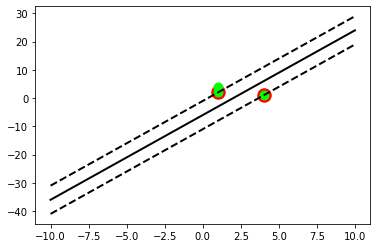

In [44]:
# 假设函数 h(x) = wx + b
def plot_svc_decision_boundary(svm_clf, xmin, xmax):
    w = svm_clf.coef_[0]
    b = svm_clf.intercept_[0]
    
    
    # w0*x0 + w1*x1 + b = 0
    # x1 = -w0/w1 * x0 - b/w1
    x0 = np.linspace(xmin, xmax, 5)
    decision_boundary = -w[0]/w[1] * x0 - b/w[1]
    
    print( w, b, decision_boundary)
    
    # 为什么这里是这个 Margin的计算方式
    # w0*x0 + w1*x1 + b = -1  --> -w0/w1 * x0 - b/w1 - 1/w1
    # w0*x0 + w1*x1 + b = 1  --> -w0/w1 * x0 - b/w1 + 1/w1
    # decision_boundary = -w0/w1 * x0 - b/w1 替换后获得
    margin = 1/w[1]
    gutter_up = decision_boundary + margin
    gutter_down = decision_boundary - margin
    
    svs = svm_clf.support_vectors_
    print(svs)
    plt.scatter(svs[:, 0], svs[:, 1], s=180, facecolors="#FF0000")
    plt.plot(x0, decision_boundary, "k-", linewidth=2)
    plt.plot(x0, gutter_up, "k--", linewidth=2)
    plt.plot(x0, gutter_down, "k--", linewidth=2)

plot_svc_decision_boundary(svm_clf, -10, 10)
plt.scatter([1, 1, 4], [4, 2, 1], s=80, facecolors="#00FF00")